# Group Members

### Muhammad Asadullah
### Syed Rafay Hashmi
### Zain Mansoor

# >>>>>>Digital Signal Processing Complex Engineering Problem<<<<<

### INSTALLATION OF LIBRARIES

In [15]:
!pip install pydub
!pip install ffmpeg-python
!pip install pyaudio

### LIBRARIES IMPORTED

In [1]:
import pyaudio
import wave

### SETTING THE AUDIO PARAMETERS

In [2]:
chunk = 1024  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 2  
fs = 44100  # Record at 44100 samples per second
seconds = 10
filename = "output.wav"

### Interface to PortAudio

In [3]:
p = pyaudio.PyAudio()  # Create an interface to PortAudio

### Recording Audio Signal

In [4]:
print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 10 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream 
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

Recording
Finished recording


### Saving of Recorded Signal

In [5]:
# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

### Playing Audio Segment 

In [7]:
from pydub import AudioSegment
from pydub.playback import play

sound = AudioSegment.from_wav('./output.wav')
play(sound)

### Plotting the audio signal

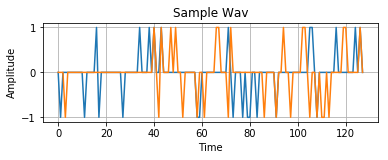

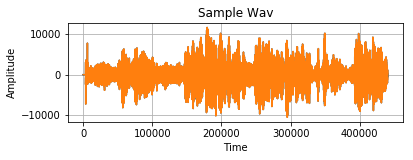

In [12]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("P:\DSP_PYTHON\output.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.subplot(2,1,1)
plt.plot(audio[0:128])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
plt.grid()
# display the plot
plt.show()
plt.subplot(2,1,2)
plt.plot(audio)
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
plt.grid()
# display the plot
plt.show()

# Plotting of sine wave in continuous and discrete time

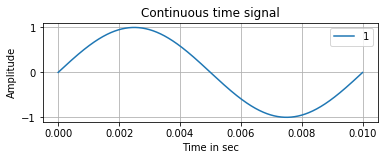

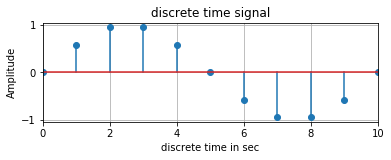

In [14]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,0.01,.000005)
ft = 100 # frequency of continuous time signal
xt = np.sin(2*np.pi*ft*t)
fs = 1000 # Sampling frequency
ts = 1 /fs
n = np.arange(0,20,1)
xn = np.sin(2*np.pi*(ft / fs)*n) # (ft / fs) is frequency of discrete time signal
plt.subplot(2,1,1)
plt.plot(t,xt)
plt.xlabel("Time in sec")
plt.ylabel("Amplitude")
plt.title("Continuous time signal")
plt.legend("1 Hz")
plt.grid()
plt.show()
plt.subplot(2,1,2)
plt.stem(n,xn)
plt.xlabel("discrete time in sec")
plt.ylabel("Amplitude")
plt.title("discrete time signal")
plt.xlim(0,10)
plt.grid()
plt.show()